## Calculate GPP from NIRv

In this notebook...

In [1]:
# import libraries
import glob
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# get spatial means for Germany for NIRv
# first, get values for broadleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*BL*.nc"))
nirv_monthly_BL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [4]:
# now, the same for needleleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*NL*.nc"))
nirv_monthly_NL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [5]:
# calculate mean NIRv values per month for Germany
nirv_monthly_spatial_means_BL = nirv_monthly_BL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_NL = nirv_monthly_NL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_BL

,NIRv,crs,spatial_ref
time,,,
1981-06-01,0.174200,0,0
1981-07-01,0.152914,0,0
1981-08-01,0.113898,0,0
1981-09-01,0.119536,0,0
1981-10-01,0.084218,0,0
...,...,...,...
2024-08-01,0.240347,-127,0
2024-09-01,0.216595,-127,0
2024-10-01,0.155714,-127,0


In [6]:
# drop unneeded columns
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.drop(['crs', 'spatial_ref'], axis=1)
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.drop(['crs', 'spatial_ref'], axis=1)

In [7]:
# rename column with gpp value to show area
nirv_monthly_spatial_means_BL.rename({"NIRv":"GER"}, axis=1, inplace=True)
nirv_monthly_spatial_means_NL.rename({"NIRv":"GER"}, axis=1, inplace=True)

In [8]:
# turn index with time values into column
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.reset_index()
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.reset_index()

In [9]:
# convert the time values to pandas datetime
nirv_monthly_spatial_means_BL["time"] = pd.to_datetime(nirv_monthly_spatial_means_BL["time"])
nirv_monthly_spatial_means_NL["time"] = pd.to_datetime(nirv_monthly_spatial_means_NL["time"])

In [10]:
nirv_monthly_spatial_means_BL

,time,GER
0,1981-06-01,0.174200
1,1981-07-01,0.152914
2,1981-08-01,0.113898
3,1981-09-01,0.119536
4,1981-10-01,0.084218
...,...,...
517,2024-08-01,0.240347
518,2024-09-01,0.216595
519,2024-10-01,0.155714
520,2024-11-01,0.103326


In [11]:
# load spatial means for Germany for MODIS and VOCDCA2 GPP
gpp_modis_BL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_BL.csv")
gpp_modis_NL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_NL.csv")
gpp_vodca_BL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_BL.csv")
gpp_vodca_NL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_NL.csv")

In [12]:
# convert the time values to pandas datetime
gpp_modis_BL["time"] = pd.to_datetime(gpp_modis_BL["time"])
gpp_modis_NL["time"] = pd.to_datetime(gpp_modis_NL["time"])
gpp_vodca_BL["time"] = pd.to_datetime(gpp_vodca_BL["time"])
gpp_vodca_NL["time"] = pd.to_datetime(gpp_vodca_NL["time"])

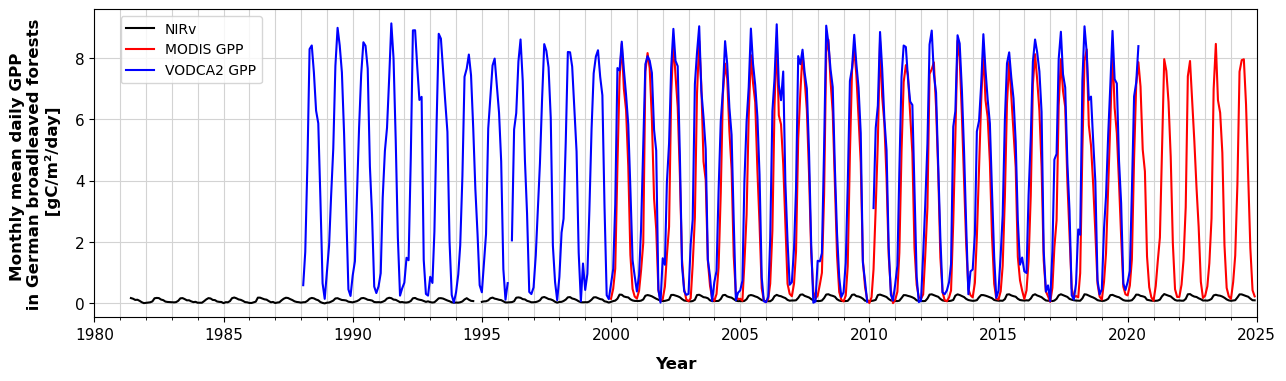

In [13]:
# plot spatial means for BL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_BL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_BL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_BL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German broadleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

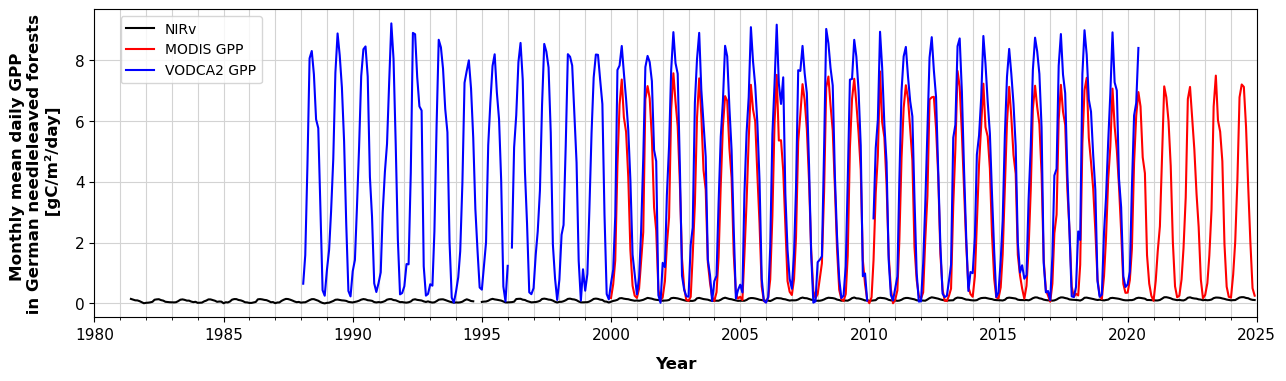

In [14]:
# plot spatial means for NL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_NL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_NL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_NL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German needleleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

In [15]:
# merge datasets into one dataframe with common time values to create scatterplots
df_nirv_modis_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_modis_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)
df_nirv_modis_BL

,time,NIRv,MODIS GPP
0,2000-02-01,0.074901,0.480098
1,2000-03-01,0.090748,1.134153
2,2000-04-01,0.152040,4.493022
3,2000-05-01,0.286408,7.337403
4,2000-06-01,0.281401,8.465317
...,...,...,...
294,2024-08-01,0.240347,6.482536
295,2024-09-01,0.216595,4.049793
296,2024-10-01,0.155714,1.796794
297,2024-11-01,0.103326,0.428716


In [16]:
df_nirv_modis_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_modis_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)

In [17]:
df_nirv_vodca_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_vodca_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

In [18]:
df_nirv_vodca_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_vodca_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

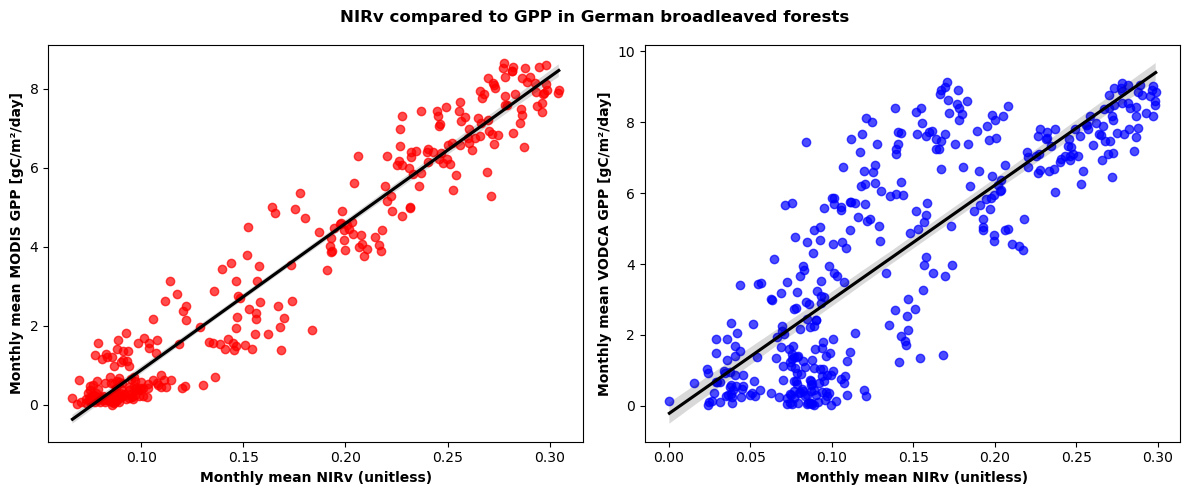

In [19]:
# create scatterplots for BL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_BL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_BL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German broadleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

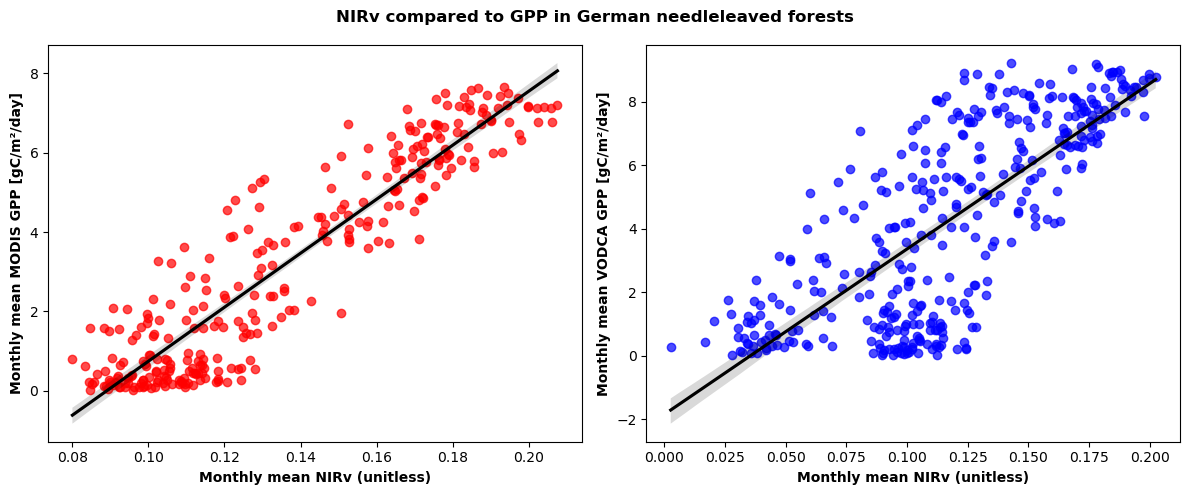

In [20]:
# create scatterplots for NL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_NL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_NL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German needleleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

In [21]:
# divide modis and vodca gpp by nirv to determine alpha value
df_nirv_modis_BL["Quotient"] = df_nirv_modis_BL["MODIS GPP"] / df_nirv_modis_BL["NIRv"]
df_nirv_modis_NL["Quotient"] = df_nirv_modis_NL["MODIS GPP"] / df_nirv_modis_NL["NIRv"]
df_nirv_vodca_BL["Quotient"] = df_nirv_vodca_BL["VODCA2 GPP"] / df_nirv_vodca_BL["NIRv"]
df_nirv_vodca_NL["Quotient"] = df_nirv_vodca_NL["VODCA2 GPP"] / df_nirv_vodca_NL["NIRv"]

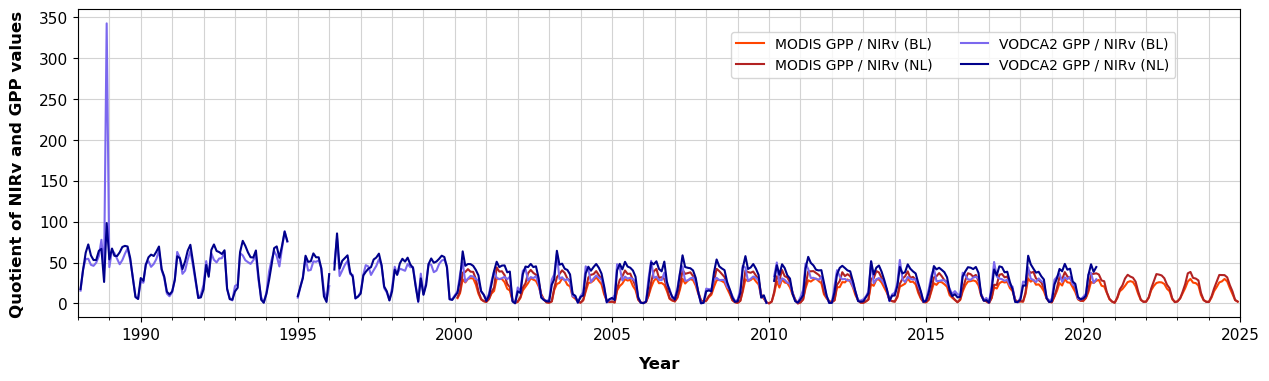

In [22]:
# plot result
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_BL, color='mediumslateblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_NL, color='darkblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1988, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.95), ncol = 2)

In [23]:
# have a look at extreme value in 1988
df_1988 = df_nirv_vodca_BL[df_nirv_vodca_BL['time'].dt.year == 1988]
df_1988

,time,NIRv,VODCA2 GPP,Quotient
0,1988-02-01,0.037917,0.593664,15.656948
1,1988-03-01,0.040460,1.679584,41.511774
2,1988-04-01,0.084846,4.614831,54.390837
3,1988-05-01,0.151773,8.291438,54.630549
4,1988-06-01,0.178094,8.409732,47.220673
5,1988-07-01,0.163776,7.531046,45.983737
6,1988-08-01,0.126232,6.284969,49.788887
7,1988-09-01,0.101399,5.872765,57.917179
8,1988-10-01,0.043940,3.420233,77.838052
9,1988-11-01,0.015512,0.654740,42.208745


In [24]:
# plot again without value of December 1988
exclude_time = datetime(1988, 12, 1)
df_nirv_vodca_BL_filtered = df_nirv_vodca_BL[df_nirv_vodca_BL['time'] != exclude_time]

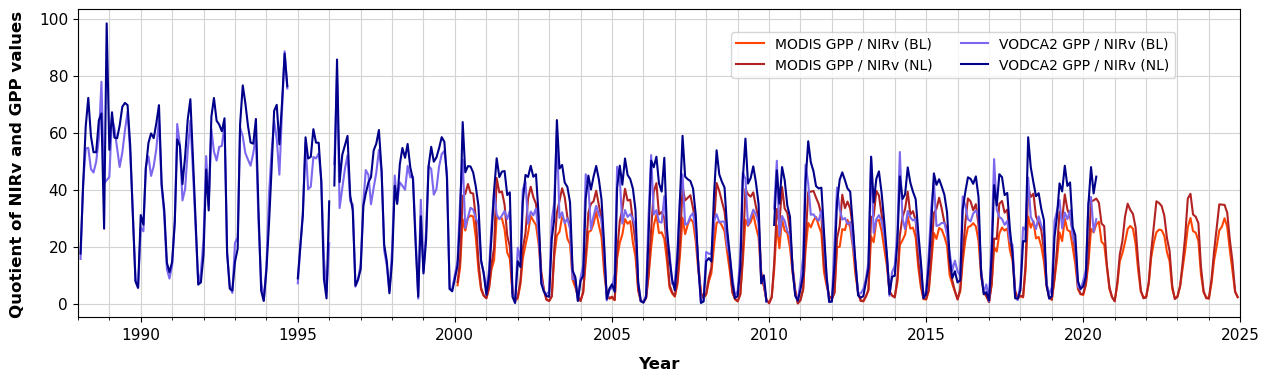

In [25]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'Quotient', data=df_nirv_modis_BL, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_modis_NL, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP / NIRv (NL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_BL_filtered, color='mediumslateblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (BL)")
ax.plot('time', 'Quotient', data=df_nirv_vodca_NL, color='darkblue', linewidth=1.5, linestyle='-', label="VODCA2 GPP / NIRv (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Quotient of NIRv and GPP values', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1988, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.95, 0.95), ncol = 2)

In [26]:
# look at the means of the quotients
print(f"Mean of the quotient NIRv / MODIS GPP (BL forest): {df_nirv_modis_BL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / MODIS GPP (NL forest): {df_nirv_modis_NL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (BL forest): {df_nirv_vodca_BL["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (BL forest, filtered): {df_nirv_vodca_BL_filtered["Quotient"].mean()}")
print(f"Mean of the quotient NIRv / VODCA2 GPP (NL forest): {df_nirv_vodca_NL["Quotient"].mean()}")

Mean of the quotient NIRv / MODIS GPP (BL forest): 16.04817960581371
Mean of the quotient NIRv / MODIS GPP (NL forest): 20.50313315415054
Mean of the quotient NIRv / VODCA2 GPP (BL forest): 30.0942554410431
Mean of the quotient NIRv / VODCA2 GPP (BL forest, filtered): 29.274346868303226
Mean of the quotient NIRv / VODCA2 GPP (NL forest): 33.827937140715584
